## Import library python

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Import Libarary for upload Google.colab to upload files

In [5]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['data.csv']))

#**EDA**

In [7]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [8]:
data.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [9]:
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [10]:
data.shape

(11914, 16)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


In [12]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


# Dealing with NAN

In [13]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [0]:
data.dropna(inplace=True,axis=0)

In [15]:
data.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

# Dealing Outlier 

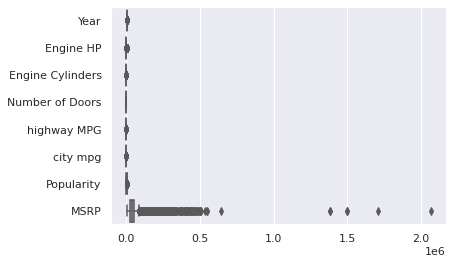

In [16]:
sns.boxplot(data=data,orient='h',palette='Set2')

In [0]:
data['new msrp'] = np.log1p(data.MSRP)
data.drop('MSRP', axis=1, inplace=True)

In [18]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,new msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,10.739349
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,10.612779
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,10.500977
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,10.290483
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,10.448744


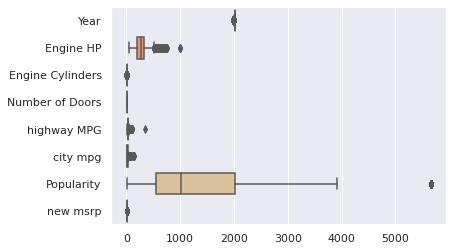

In [19]:
sns.boxplot(data=data,orient='h',palette='Set2')

In [20]:
q1, q3 = np.percentile(data['Popularity'],[25,75])
iqr = q3-q1
whisker = q3 + (1.5 * iqr)
print(whisker)

4199.0


In [0]:
data['Popularity'] = data['Popularity'].clip(upper=whisker)

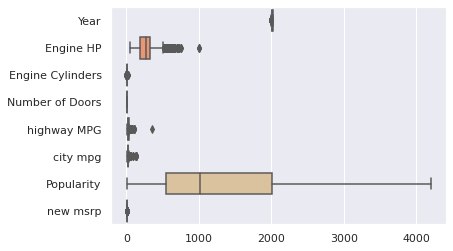

In [22]:
sns.boxplot(data=data,orient='h',palette='Set2')

# **creating Label Encoder for categorical variables**

In [0]:
# For Label Encoder data types need to be cat 
columns_to_convert=['Make','Model','Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size','Vehicle Style']
data[columns_to_convert] = data[columns_to_convert].astype('category')

In [24]:
data.dtypes


Make                 category
Model                category
Year                    int64
Engine Fuel Type     category
Engine HP             float64
Engine Cylinders      float64
Transmission Type    category
Driven_Wheels        category
Number of Doors       float64
Market Category      category
Vehicle Size         category
Vehicle Style        category
highway MPG             int64
city mpg                int64
Popularity              int64
new msrp              float64
dtype: object

In [0]:
 # Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
for col in ['Make','Model','Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size','Vehicle Style']: data[col] = label_encoder.fit_transform(data[col])


In [26]:
data.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,new msrp
0,4,1,2011,6,335.0,6.0,3,3,2.0,37,0,8,26,19,3916,10.739349
1,4,0,2011,6,300.0,6.0,3,3,2.0,66,0,6,28,19,3916,10.612779
2,4,0,2011,6,300.0,6.0,3,3,2.0,63,0,8,28,20,3916,10.500977
3,4,0,2011,6,230.0,6.0,3,3,2.0,66,0,8,28,18,3916,10.290483
4,4,0,2011,6,230.0,6.0,3,3,2.0,62,0,6,28,18,3916,10.448744


In [27]:
data.shape

(8084, 16)

#correaltion





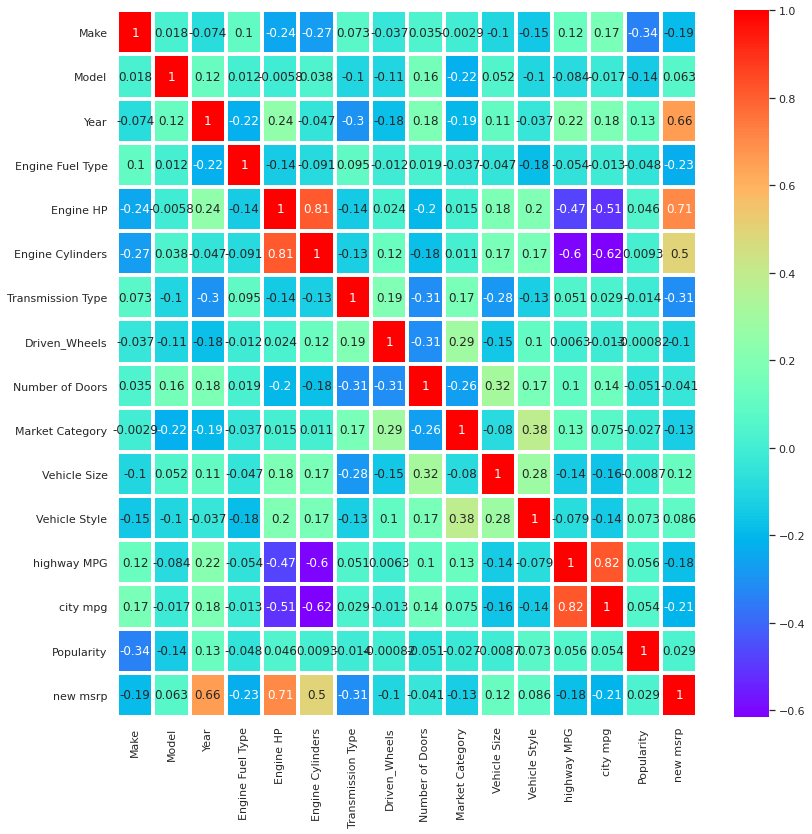

In [28]:
import seaborn as sns
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(13,13))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='rainbow',linewidths=3)


In [29]:
X = data.corr()
X['new msrp'].sort_values(ascending=False)

new msrp             1.000000
Engine HP            0.705369
Year                 0.658258
Engine Cylinders     0.496731
Vehicle Size         0.117713
Vehicle Style        0.086207
Model                0.062594
Popularity           0.028981
Number of Doors     -0.040657
Driven_Wheels       -0.100777
Market Category     -0.134591
highway MPG         -0.179530
Make                -0.186651
city mpg            -0.208235
Engine Fuel Type    -0.229984
Transmission Type   -0.307729
Name: new msrp, dtype: float64

In [30]:
xy = ['new msrp','Engine HP','Year','Engine Cylinders']
data_ve = data[xy]
New_data = data.copy()
data_ve.head()


,new msrp,Engine HP,Year,Engine Cylinders
0,10.739349,335.0,2011,6.0
1,10.612779,300.0,2011,6.0
2,10.500977,300.0,2011,6.0
3,10.290483,230.0,2011,6.0
4,10.448744,230.0,2011,6.0


#*Decoupling target*

In [31]:
data = data_ve
target = "new msrp"

X = data[data.columns.difference([target])]
y = data['new msrp']
print(X.shape)
y.shape



(8084, 3)


(8084,)

*Test-Train split*

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=124421)


Model Bulidling 

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics



In [34]:
linear = LinearRegression()
linear.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
#To retrieve the intercept:
print(linear.intercept_)
#For retrieving the slope:
print(linear.coef_)

-166.7466106432449
[0.0957662  0.00347779 0.08729358]


In [36]:
y_test_predict = linear.predict(X_test)
print(y_test_predict)
y_train_predict= linear.predict(X_train)
y_train_predict

[10.98073867 10.47898523  9.6089616  ...  9.92566757 10.34673422
 10.85518938]


array([10.90726133, 10.56627881, 10.87257834, ..., 11.79409818,
       10.79959857, 10.26023315])

In [37]:
df = pd.DataFrame({'Actual': y_test, 'Predicted':y_test_predict})
df

,Actual,Predicted
5580,10.942987,10.980739
3254,10.962510,10.478985
8007,9.774290,9.608962
883,7.601402,8.552966
6708,7.601402,8.603548
...,...,...
8439,10.615726,10.869449
5567,10.568132,9.616737
11223,9.787010,9.925668
5966,10.665718,10.346734


In [38]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

print(mean_squared_error(y_train,y_train_predict))
print(mean_squared_error(y_test,y_test_predict))

print(r2_score(y_train,y_train_predict))
print(r2_score(y_test,y_test_predict))

print(mean_absolute_error(y_train,y_train_predict))
print(mean_absolute_error(y_test,y_test_predict))

0.2276462893205859
0.22704508329921527
0.7595877103901533
0.7541076666416497
0.3513359524426626
0.3507045153001955


In [39]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_train,y_train_predict)))
print(np.sqrt(metrics.mean_squared_error(y_test,y_test_predict)))


0.47712292894031605
0.47649247979292947


# Inculding neg corr

In [40]:
xyz = ['new msrp','Engine HP','Year','Engine Cylinders','Transmission Type','Engine Fuel Type','city mpg','Make','highway MPG','Market Category','Driven_Wheels']
data_all = New_data[xyz]
data_all.head()

,new msrp,Engine HP,Year,Engine Cylinders,Transmission Type,Engine Fuel Type,city mpg,Make,highway MPG,Market Category,Driven_Wheels
0,10.739349,335.0,2011,6.0,3,6,19,4,26,37,3
1,10.612779,300.0,2011,6.0,3,6,19,4,28,66,3
2,10.500977,300.0,2011,6.0,3,6,20,4,28,63,3
3,10.290483,230.0,2011,6.0,3,6,18,4,28,66,3
4,10.448744,230.0,2011,6.0,3,6,18,4,28,62,3


In [41]:
# dcoupling

data = data_all
target = "new msrp"

X = data[data.columns.difference([target])]
y = data['new msrp']
print(X.shape)
y.shape



#Train test spilt

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=124421)

# Fitting

linear = LinearRegression()
linear.fit(X_train, y_train)
# Predict

y_test_predict = linear.predict(X_test)
print(y_test_predict)
y_train_predict= linear.predict(X_train)
y_train_predict

#To retrieve the intercept:
print(linear.intercept_)
#For retrieving the slope:
print(linear.coef_)


#test vs pred
df1 = pd.DataFrame({'Actual': y_test, 'Predicted':y_test_predict})
df1
#Metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
print("MSE of Train =", mean_squared_error(y_train,y_train_predict))
print('MSE of Test',mean_squared_error(y_test,y_test_predict) )
print('r2_score of Train ', r2_score(y_train,y_train_predict))
print('r2_score of Test ',r2_score(y_test,y_test_predict))
print('MAE of Train ',mean_absolute_error(y_train,y_train_predict) )
print('MAE of Test ',mean_absolute_error(y_test,y_test_predict))

#metrics MSE
from sklearn import metrics
print('sqrt MSE of Train',np.sqrt(metrics.mean_squared_error(y_train,y_train_predict)))

print('sqrt MSE of Test', np.sqrt(metrics.mean_squared_error(y_test,y_test_predict)))


(8084, 10)
[10.96088461 10.48137003  9.49162106 ...  9.76089779 10.29723033
 10.83431505]
-152.42684155809675
[-0.01262501  0.0913591  -0.02173153  0.00367984  0.00059409 -0.00128457
 -0.06843582  0.08026781  0.0067874  -0.00248658]
MSE of Train = 0.22106614334878824
MSE of Test 0.22243399296290417
r2_score of Train  0.7665368592814803
r2_score of Test  0.7591015284141482
MAE of Train  0.34378225958103575
MAE of Test  0.34329194725976053
sqrt MSE of Train 0.4701767150219035
sqrt MSE of Test 0.4716290840935323


# ols method

In [42]:

import statsmodels.api as sm

x_train = sm.add_constant(X_train)
model = sm.OLS(y_train, x_train)
results = model.fit()
print ("r2/variance : ", results.rsquared)

r2/variance :  0.7665368592814843


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Grid search

In [43]:
from sklearn.model_selection import GridSearchCV
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True,False]}
grid = GridSearchCV(model,parameters, cv=None)
grid.fit(X_train, y_train)
print ("r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f" % np.mean((grid.predict(X_test) - y_test) ** 2))

r2 / variance :  0.7645328733868156
Residual sum of squares: 0.22


# Decision Tree





In [0]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
#data

var = ['new msrp','Engine HP','Year','Engine Cylinders','Transmission Type','Engine Fuel Type','city mpg','Make','highway MPG','Market Category','Driven_Wheels']
data_for_decision_tree = New_data[var]
data_for_decision_tree.head()


# dcoupling

data =data_for_decision_tree
target = "new msrp"

X = data[data.columns.difference([target])]
y = data['new msrp']

#Train test spilt

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124421)

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)



DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [49]:
# predicting a new value 

# test the output by changing values
y_pred1 = regr_1.predict(X_test)
y_pred2 = regr_2.predict(X_test)
# print the predicted price 
print('Value for max depth 4 =',y_pred1) 
print('Value for max depth 5 =',y_pred2) 
print('mean_squared_error max depth 4 =',mean_squared_error(y_test,y_pred1))
print('r2_score max depth 4 =',r2_score(y_test,y_pred1))
print('mean_squared_error sqrt max depth 4 =',np.sqrt(metrics.mean_squared_error(y_test,y_pred1)))
print('mean_squared_error for max depth 5 =',mean_squared_error(y_test,y_pred2))
print('r2_score max depth 5 =',r2_score(y_test,y_pred2))
print('mean_squared_error sqrt max depth 5 =',np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))


Value for max depth 4 = [10.8392997  10.54486886  9.9859297  ... 10.54486886 10.8392997
  9.9859297 ]
Value for max depth 5 = [10.83188298 10.71519135 10.03289219 ... 10.49227359 10.83188298
 10.03289219]
mean_squared_error max depth 4 = 0.07355635477612757
r2_score max depth 4 = 0.9195340688925882
mean_squared_error sqrt max depth 4 = 0.27121274818143704
mean_squared_error for max depth 5 = 0.06210263743841418
r2_score max depth 5 = 0.9320637005338686
mean_squared_error sqrt max depth 5 = 0.24920400766924714


# Hyperparameter tuning with GridSearchCV for Decision Tree





In [52]:
dtm = DecisionTreeRegressor()

param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8, 10],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

## Comment in order to publish in kaggle.

grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)

grid_cv_dtm.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 6, 8, 10],
                         'max_leaf_nodes': [5, 2

In [53]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.9568620456501366
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 10, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 10}


# Random Forest for Reggresion 

In [54]:
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(X_train, y_train)  
 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [55]:
# predicting a new value 

# test the output by changing values
y_pred = regressor.predict(X_test)
# print the predicted price 
print('Value for regressor predict=',y_pred1) 
print('mean_squared_error regressor predict =',mean_squared_error(y_test,y_pred1))
print('r2_score regressor predict =',r2_score(y_test,y_pred1))
print('mean_squared_error regressor predict =',np.sqrt(metrics.mean_squared_error(y_test,y_pred1)))


Value for regressor predict= [10.8392997  10.54486886  9.9859297  ... 10.54486886 10.8392997
  9.9859297 ]
mean_squared_error regressor predict = 0.07355635477612757
r2_score regressor predict = 0.9195340688925882
mean_squared_error regressor predict = 0.27121274818143704


# Hyperparameter tuning with GridSearchCV for Random Forest for Reggresion

In [56]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}





1.   n_estimators = number of trees in the foreset
2.   max_features = max number of features considered for splitting a node
3.   max_depth = max number of levels in each decision tree
4.   min_samples_split = min number of data points placed in a node before the node is split
5.   min_samples_leaf = min number of data points allowed in a leaf node
6.  bootstrap = method for sampling data points (with or without replacement)






Random Hyperparameter Grid

In [61]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 15, 26, 36, 47, 57, 68, 78, 89, 99, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


Random Search Training

In [62]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 18.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [63]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 99,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 800}

In [64]:
def evaluate(model,X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy



base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test )



Model Performance
Average Error: 0.0842 degrees.
Accuracy = 99.19%.


In [69]:
rf_random =  RandomForestRegressor(n_estimators= 1400,min_samples_split= 5,min_samples_leaf= 1,max_features= 'sqrt',max_depth= 78,bootstrap= False,  random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)


RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=78, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1400, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)


grid based on the results of random search




In [70]:
predictions = rf_random.predict(X_test)
# print the predicted price 
print('Value for regressor predict=',predictions) 
print('mean_squared_error regressor predict =',mean_squared_error(y_test,predictions))
print('r2_score regressor predict =',r2_score(y_test,predictions))
print('mean_squared_error regressor predict =',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Value for regressor predict= [10.82173555 10.81922279  9.71468086 ... 10.49833655 10.56056985
  9.86784492]
mean_squared_error regressor predict = 0.01183143726045426
r2_score regressor predict = 0.987057167006183
mean_squared_error regressor predict = 0.10877241038266211


In [0]:

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [66]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.6s
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  9.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [71]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [72]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 0.0897 degrees.
Accuracy = 99.13%.


In [73]:
rf_random =  RandomForestRegressor(n_estimators= 300,min_samples_split= 8,min_samples_leaf= 3,max_features= 3,max_depth= 100,bootstrap= True,  random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

predictions =rf_random.predict(X_test)
# print the predicted price 
print('Value for regressor predict=',predictions) 
print('mean_squared_error regressor predict =',mean_squared_error(y_test,predictions))
print('r2_score regressor predict =',r2_score(y_test,predictions))
print('mean_squared_error regressor predict =',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Value for regressor predict= [10.85143691 10.70173335  9.76276443 ... 10.47364432 10.57350749
  9.90584264]
mean_squared_error regressor predict = 0.01765627056933129
r2_score regressor predict = 0.9806851732176004
mean_squared_error regressor predict = 0.13287690005915734


# XGBOOST

In [0]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [76]:
# Various hyper-parameters to tune
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 24.1min finished
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.9796410918280776
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
